In [1]:
%pylab inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


# Mechanical Linear Least Squares

In [2]:
# any ipython work here
a = np.array([1,2,3,4,5,6,7,8])
b = np.array([4.5,3,4.5,6,3.5,7,5.5,8])

### Part (a)

In [3]:
# find a linear model of the form:   b = xa
# According to the least squares formula, we can calculate x
# xhat =(a.T*a)^(-1)*a.T*b
xhat = 1/np.dot(a,a)*np.dot(a,b)
print('xhat: '+str(xhat))
# The squared error is given by
bhat = xhat*a
se = np.dot(b - bhat,b-bhat)
print('the squared error is '+str(se))


xhat: 1.02941176471
the squared error is 24.8235294118


Notice that the fit is okay but could be made better if we added a b-intercept.


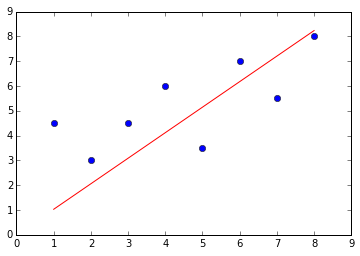

In [4]:
#HERE IS HOW TO PLOT POINTS
plt.plot(a,b,'ob') 
#HERE IS HOW TO PLOT A LINE
plt.plot(a,bhat,'-r')
#HERE IS HOW TO CHANGE THE LIMITS OF THE PLOTTING WINDOW
plt.xlim([0,9]); plt.ylim([0,9]);

print('Notice that the fit is okay but could be made better if we added a b-intercept.')

### Part (b)

In [15]:
# The augmented A matrix is given by
a2 = a.copy()
b2 = b.copy()
A2 = np.vstack([a2,np.ones(len(a2))]).T
print('The augmented A matrix is')
print(A2)
# by the least squares formula we can calculate xhat
xhat2 = np.dot(np.linalg.inv(np.dot(A2.T,A2)),np.dot(A2.T,b2))
print('xhat:')
print(xhat2)
# The squared error is given by
bhat2 = np.dot(A2,xhat2)
se2 = np.dot(b2 - bhat2,b2-bhat2)
print('the squared error is '+str(se2))




The augmented A matrix is
[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]]
xhat:
[ 0.5  3. ]
the squared error is 10.0


By adding a b-intercept we have definitely improved the fit.
This can be seen in the graph as well as the value of the squared error


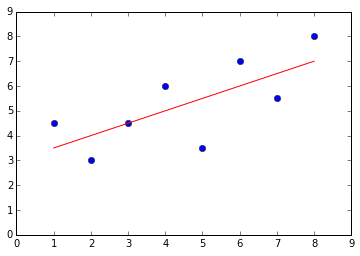

In [16]:
#HERE IS HOW TO PLOT POINTS
plt.plot(a2,b2,'ob') 
#HERE IS HOW TO PLOT A LINE
plt.plot(a2,bhat2,'-r')
#HERE IS HOW TO CHANGE THE LIMITS OF THE PLOTTING WINDOW
plt.xlim([0,9]); plt.ylim([0,9]);
print('By adding a b-intercept we have definitely improved the fit.')
print('This can be seen in the graph as well as the value of the squared error')


# Labeling Patients

In [19]:
A = np.load('gene_data_train.npy')
b = np.load('diabetes_train.npy')

In [20]:
#Calculate the coefficients using the train set
trans = A.T
sqr = trans.dot(A)
pseudoinv = (inv(sqr)).dot(trans)
x = pseudoinv.dot(b)
print x

[[-0.15646169]
 [ 0.09239418]
 [ 0.48053974]
 [-0.5847018 ]
 [-0.35350734]]


In [21]:
#Test if these coefficients give the correct answer for the train set
b_new = np.sign(A.dot(x))
print b - b_new

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [22]:
A_test = np.load('gene_data_test.npy')
b_test = np.load('diabetes_test.npy')

In [23]:
#Use your alpha coefficients on the test set and check their acuracy
b_calc = np.sign(A_test.dot(x))
print b_calc
print b_calc - b_test

[[ 1.]
 [-1.]
 [-1.]
 [ 1.]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


# GPS Receivers

In [5]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    G2_out = np.roll(MLS2,delay[satellite_ID - 1])
    
    CA_code = G1_out * G2_out
    
    return CA_code

Part A
===

<Container object of 3 artists>

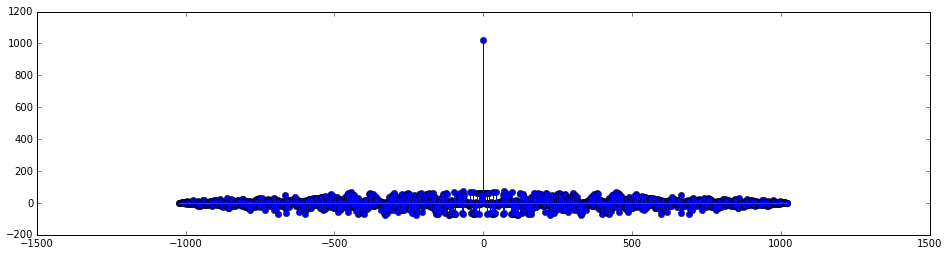

In [6]:
## PART A CODE HERE
def array_correlation(array1,array2):
    """ This function should return two array or a matrix with one row corresponding to 
    the offset and other to the correlation value
    """
    ## INSERT YOUR CODE HERE
    ## Use np.correlate with "FULL". Check out the helper page for it 
    correlated_array = np.correlate(array1,array2,'full')
    length1 = len(array1)
    length2 = len(array2)
    min_ind = min(length1,length2)
    max_ind = max(length1,length2)
    indices = np.linspace(-min_ind + 1, max_ind - 1, min_ind + max_ind -1)
    return (indices, correlated_array)

array_10 = Gold_code_satellite(10)
(ind_10, self_10) = array_correlation(array_10,array_10)
plt.figure(figsize=(16,4))
plt.stem(ind_10,self_10)

The autocorrelation peaks at 1023 when the signals are perfectly aligned (offset 0). The correlation of a gold code with a shifted version of itself is not significant.

Part B
===

<Container object of 3 artists>

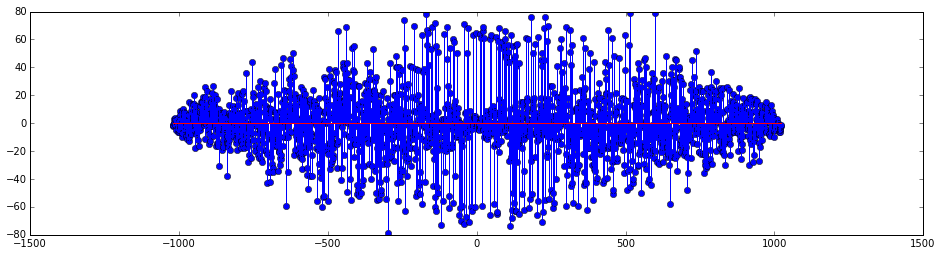

In [26]:
## PART B CODE HERE
array_13 = Gold_code_satellite(13)
(ind_10_13, cross_10_13) = array_correlation(array_10,array_13)
plt.figure(figsize=(16,4))
plt.stem(ind_10_13,cross_10_13)

We see that the cross-correlation of gold code of any satellite with any other satellite is very low and this indicates that when given with an unknown data, we can differentiate between different satellites.

Part C
===

<Container object of 3 artists>

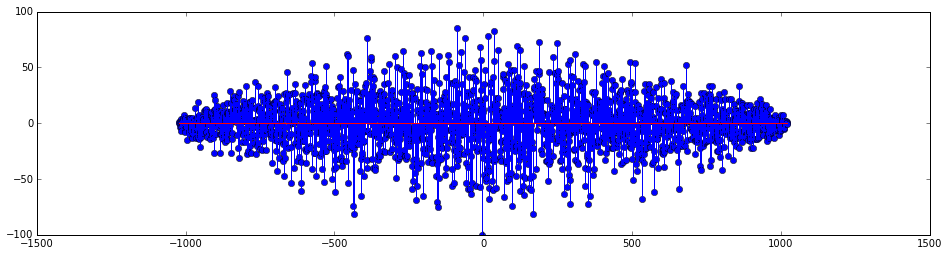

In [27]:
## PART C CODE HERE
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2,size = length_of_noise)
    noise_array = 2*noise_array - np.ones(size(noise_array))
    return noise_array

intrand_signal = integernoise_generator(1023)
(ind_intrand,cross_intrand) =array_correlation(array_10,intrand_signal)
plt.figure(figsize=(16,4))
plt.stem(ind_intrand,cross_intrand)

We see that the cross-correlation of the gold code of any satellite with integer noise is very low and indicates that we can still figure out the presence of a satellite even if it is buried in noise.

Part D
===

<Container object of 3 artists>

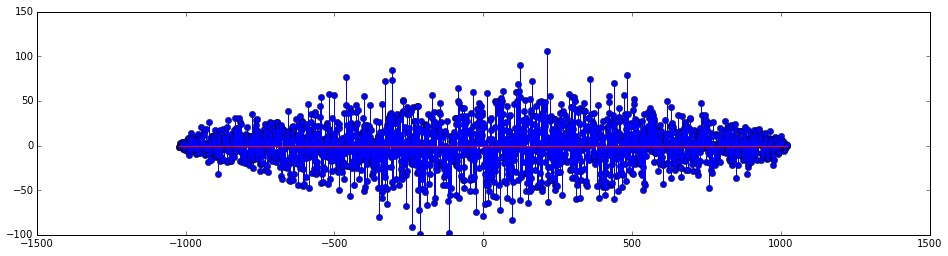

In [28]:
## PART D CODE HERE
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0,1,length_of_noise)
    return noise_array

gaussrand_signal = gaussiannoise_generator(1023)
(ind_gaussrand,cross_gaussrand) =array_correlation(array_10,gaussrand_signal)
plt.figure(figsize=(16,4))
plt.stem(ind_gaussrand,cross_gaussrand)

We see that the gold code of any satellite with Gaussian noise is very low and indicates that we can still figure out the presence of a satellite even if it is buried in Gaussian noise.

Part E
===

In [8]:
## PART E CODE HERE
## USE 'LOAD' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY
## This function returns a 1 if peak (greater than threshold or less than -threshold) is found else it returns a 0.
def find_peak(signal,threshold):
    max_value = np.amax(signal)
    min_value = np.amin(signal)
    if max_value > threshold:
        ret_value = 1
    elif min_value < -1*threshold:
        ret_value = 1
    else:
        ret_value = 0
    return ret_value
    
signal1 = np.load('data1.npy')
visible_sat_e = np.zeros(24)
thresh = 800
for sat_ID in np.linspace(1,24,24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices,correlation) = array_correlation(gold_code,signal1)
    visible_sat_e[sat_ID-1] = find_peak(correlation,thresh)

print visible_sat_e
## The satellites that are present are 4, 7, 13, 19

[ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.]


/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Alternate Approach:
--

Plot all the correlation figures to visually figure out which satellites are present.

In [ ]:
plt.figure(figsize=(16,36))
for i in np.linspace(1,24,24):
    plt.subplot(12,2,i)
    (indic, correl) = array_correlation(Gold_code_satellite(i),signal1)
    plt.stem(indic,correl)
    plt.title('cross-correlation with satellite %d'%(i))

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[2045],
       [3068],
       [4091]])

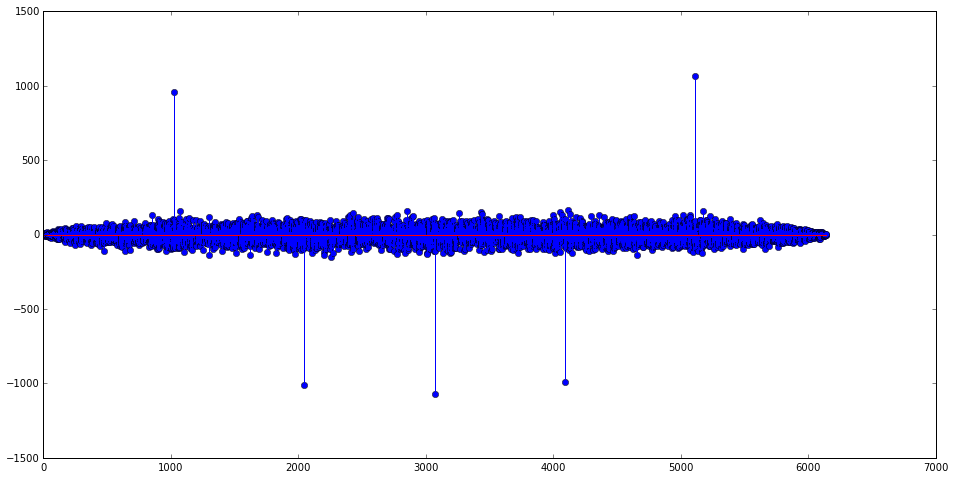

In [9]:
## PART F CODE HERE
## USE DATA2.NPY AS THE SIGNAL ARRAY
signal2 = np.load('data2.npy')
visible_sat_f = np.zeros(24)
thresh = 800
for sat_ID in np.linspace(1,24,24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices,correlation) = array_correlation(gold_code,signal2)
    visible_sat_f[sat_ID-1] = find_peak(correlation,thresh)

print visible_sat_f

## Satellite visible is satellite 3. Let's now proceed to find the data
array_3 = Gold_code_satellite(3)
(ind_3,sat3_data) = array_correlation(signal2,array_3)
plt.figure(figsize=(16,8))
plt.stem(sat3_data)
## This tells us visually that the data is 1, -1, -1, -1, 1
## Another way to do this (which will come handle in the next part) is as follows

## Find all 1s:
np.argwhere(sat3_data>thresh)

## Find all -1s:
np.argwhere(sat3_data< -1*thresh)

## This again tells us that the data is 1, -1, -1, -1, 1

Part G
===

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.]


/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<Container object of 3 artists>

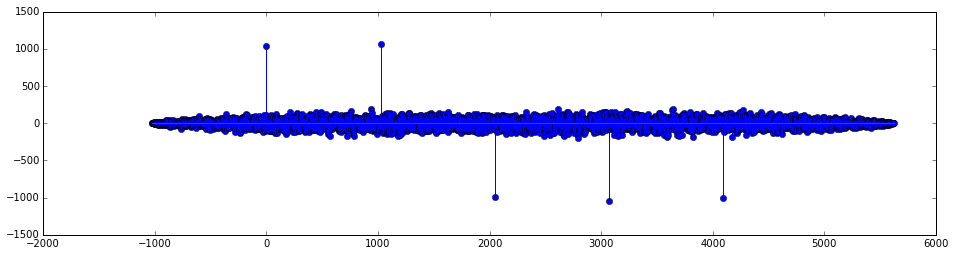

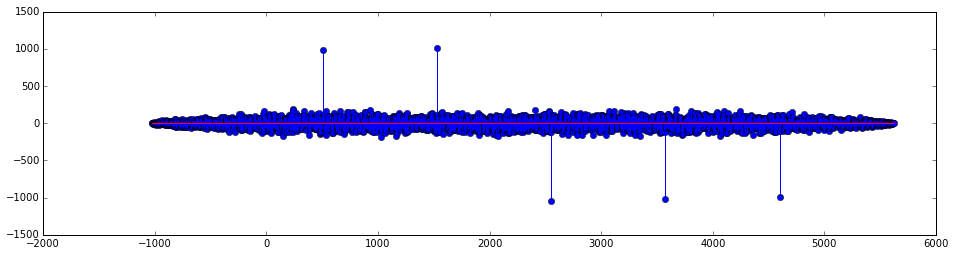

In [11]:
## PART G CODE HERE
## USE DATA3.NPY AS THE SIGNAL ARRAY
signal3 = np.load('data3.npy')
visible_sat_g = np.zeros(24)
thresh = 800
for sat_ID in np.linspace(1,24,24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices,correlation) = array_correlation(gold_code,signal3)
    visible_sat_g[sat_ID-1] = find_peak(correlation,thresh)

print visible_sat_g
## This tells us that the satellites present in this data are 5 and 20. 
## As we know that the data is 1, 1, -1, -1, -1; we just find the positions of 1s in both the satellite correlations

array_5 = Gold_code_satellite(5)
array_20 = Gold_code_satellite(20)
(ind_5,sat5_data) = array_correlation(signal3,array_5)
(ind_20,sat20_data) = array_correlation(signal3,array_20)
plt.figure(figsize=(16,4))
plt.stem(ind_5,sat5_data)

plt.figure(figsize=(16,4))
plt.stem(ind_20,sat20_data)



In [12]:
## Find all 1s:
sat5_ones = np.argwhere(sat5_data>thresh)
sat20_ones = np.argwhere(sat20_data>thresh)
Delay = sat20_ones[0] - sat5_ones[0]
## This gives us that the relative delay is 506 samples
print('Delay', Delay)

('Delay', array([506]))
